In [1]:
#using macbook OS X El Capitan Version 10.11.6
#import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
#!pip install seaborn --upgrade #updating
import seaborn as sns


# Read in data

In [3]:
#set the .ipynb file and data to the same folder (hence, no need to provide path) otherwise, use path-url in pd.read_table
df_cust = pd.read_table('CustomerData.txt', sep= '|')
df_tran = pd.read_table('TransactionsData.txt', sep='|')
df_item = pd.read_table('ItemData.txt', sep = '|')

In [4]:
#replacing empty spaces with nan-values, hence it gets easier in the next step to count them
df_cust = df_cust.replace(' ', np.nan)
df_tran = df_tran.replace(' ', np.nan)
df_item = df_item.replace(' ', np.nan)

# How many values are missing per column?

In [5]:
#identify the number of values which is null
nan_cust = df_cust.isnull().sum()
nan_tran = df_tran.isnull().sum()
nan_item = df_item.isnull().sum()

print(nan_cust, nan_tran, nan_item)

USERID         0
GENDER         0
DOB            0
COUNTRY        0
EDUCATION    112
HOBBY         25
dtype: int64 USERID             92
WEBBROWSER       4012
PPC_ADD           440
ITEM                1
PURCHASE         5960
QTY              5264
DISCOUNT          610
PAYMENT         12101
WAREHOUSE        9859
SHIPDAYS         5992
DELIVERYDATE     2071
REVIEW           5951
RATING          15611
TRACKNO             0
TIMESTAMP        1017
dtype: int64 ITEM                0
CATEGORY            0
COLOR               0
SUPLID           2172
PURCHASEPRICE       2
SALEPRICE           3
dtype: int64


In [6]:
#convert to multiindex and then use bar chart
nan_cust = pd.DataFrame(nan_cust)
nan_tran = pd.DataFrame(nan_tran)
nan_item = pd.DataFrame(nan_item)


Text(0.5, 1.0, 'Transaction Data')

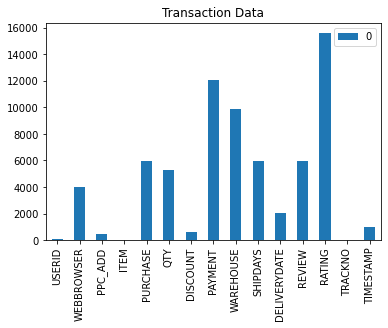

In [7]:
#plot the different data individually --> hence easier to discuss with client
nan_tran.plot(kind='bar')
plt.title('Transaction Data')

Text(0.5, 1.0, 'Customer Data')

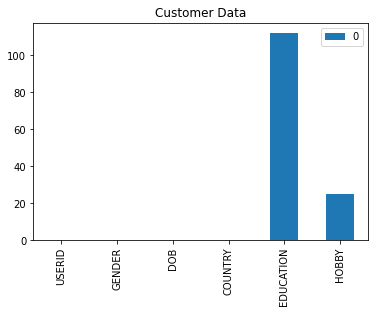

In [8]:
nan_cust.plot(kind='bar')
plt.title('Customer Data')


Text(0.5, 1.0, 'Item Data')

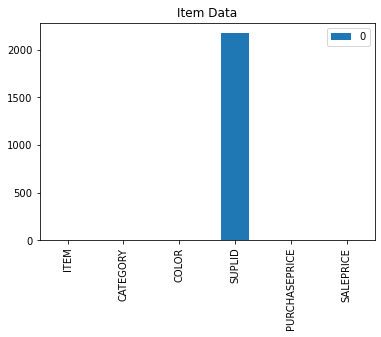

In [9]:
nan_item.plot(kind='bar')
plt.title('Item Data')

# How many transactions does each user have?

In [10]:
df_tran.tail()
#drop all NA userid
df_tran1 = df_tran[df_tran.USERID != ' ']

In [11]:
#group them by user and count the occurence of the different userids
df_tran_number = df_tran1.groupby(['USERID']).size().reset_index(name='count')

In [12]:
tran_sorted = df_tran_number.sort_values(by=['count'], ascending=False)

In [13]:
tran_sorted

,USERID,count
296,30840,131
547,48260,129
512,46380,128
39,12690,127
138,19660,126
...,...,...
49,13150,82
235,26220,81
15,11240,78
135,19460,78


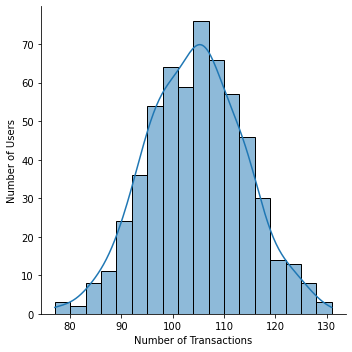

In [14]:
#plot distribution of userid occurence to get a better overview
ax = sns.displot(df_tran_number, x='count', kde=True, fill=True)
ax.set(xlabel='Number of Transactions', ylabel='Number of Users')
plt.show()

# What is our most popular item category?

In [15]:
#identifying the needed categories
df_qty = df_tran[['ITEM','PURCHASE', 'QTY']]

In [16]:
#value only completed purchases, this excludes for returns, canceled orders etc.
df_qty = df_qty.dropna(axis=0)
df_qty = df_qty[~df_qty.PURCHASE.str.contains('NO')]

In [17]:
#don't need the purchase column
df_qty = df_qty.drop('PURCHASE', axis=1)

In [18]:
#error due to not numeric numbers, converting numbers 
df_qty['QTY'] = df_qty.QTY.str.split(',').str[0].astype(int)
df_qty['ITEM'] = df_qty.ITEM.str.split(',').str[0].astype(float)

In [19]:
#groupby item
df_qty1=df_qty.groupby(['ITEM']).sum().reset_index()


In [20]:
#sum the quantities to later be able to check that they match 
df_qty1['QTY'].sum()

118781

In [21]:
df_qty1

,ITEM,QTY
0,100000.0,9
1,100013.0,9
2,100026.0,21
3,100039.0,5
4,100078.0,7
...,...,...
21725,499893.0,9
21726,499906.0,13
21727,499932.0,2
21728,499971.0,6


In [22]:
#create df for item categories and drop duplicates
pop_item_df1 = df_item.copy()
pop_item_cate = pop_item_df1[['ITEM', 'CATEGORY']]
#since the item cate column has two of each, drop one identical
pop_item_cate = pop_item_cate.drop_duplicates()

In [23]:
pop_item_cate

,ITEM,CATEGORY
0,383985.0,JEANS
1,327162.0,DRESS
2,154080.0,SHIRT
3,244638.0,SCARF
4,320285.0,DRESS
...,...,...
29995,473126.0,SCARF
29996,455589.0,DRESS
29997,182459.0,BELT
29998,298744.0,TIE


In [24]:
#creating keys in order to use the merge command, see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
df_1 = pd.DataFrame(dict(ITEM = list(pop_item_cate['ITEM'].astype('int64')), CATEGORY = list(pop_item_cate['CATEGORY'])))
df_2 = pd.DataFrame(dict(item = list(df_qty1['ITEM']), qty = list(df_qty1['QTY'])))

In [25]:
#merge the dataframes
df_4 = (pd.merge(df_2, df_1, left_on='item', right_on='ITEM', how='left').drop('ITEM', axis=1))

In [26]:
#set to int, for sorting
df_4['item'] = df_4['item'].astype('int64')

In [27]:
df_4

,item,qty,CATEGORY
0,100000,9,PAJAMAS
1,100013,9,DRESS
2,100026,21,TIE
3,100039,5,PANTS
4,100078,7,BELT
...,...,...,...
21725,499893,9,JEANS
21726,499906,13,DRESS
21727,499932,2,GLOVES
21728,499971,6,HAT


In [28]:
#aggregate by using agg to count sum the quantity for each transactions and then add them to item (category)
df_4_sort = df_4.groupby(['CATEGORY'], as_index=False).agg({'qty':'sum'})

In [29]:
#sort values for plotting purposes
df_4_sort = df_4_sort.sort_values(by='qty', ascending=False)

In [30]:
#checking so quantity sums to the first - it does
df_4_sort['qty'].sum()

118781

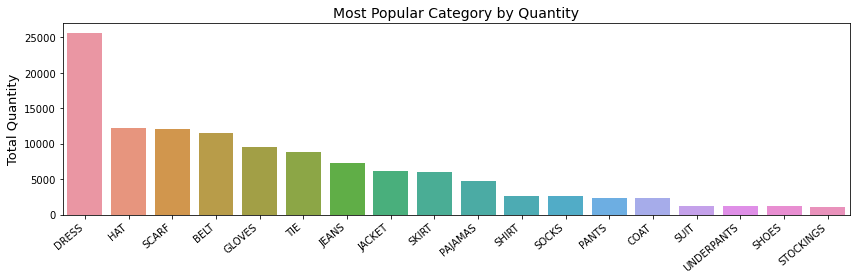

In [31]:
#plot
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x=df_4_sort['CATEGORY'], y=df_4_sort['qty'])
plt.xlabel('')
plt.ylabel('Total Quantity', size=13)
plt.title('Most Popular Category by Quantity', size=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# What is the value of the transactions for us as a company?

In [32]:
#Due to the fact that we cannot secure that the value of transactions with missing data, we drop these rows.
#Hence, we only value transactions in which we have can securely state the outcome.

df_track = df_tran.copy()
df_track = df_track[['ITEM', 'QTY', 'DISCOUNT','PURCHASE']]
df_track.dropna(axis=0, inplace=True)

In [33]:
#using the same dataframe as before, same assumptions (only complete orders)

df_track['ITEM'] = df_track.ITEM.str.split(',').str[0].astype(float)
df_track['QTY'] = df_track.QTY.str.split(',').str[0].astype(int)
df_track['DISCOUNT'] = df_track.DISCOUNT.str.split(',').str[0].astype(int)
df_track = df_track[~df_track.PURCHASE.str.contains('NO')]
df_track = df_track.drop('PURCHASE', axis=1)


In [34]:
#need the price of the columns in order to value the transactions
df_price = df_item[['ITEM', 'SALEPRICE']]

In [35]:
#drop duplicates
df_price = df_price.drop_duplicates()

In [36]:
df_price

,ITEM,SALEPRICE
0,383985.0,1870.0
1,327162.0,360.0
2,154080.0,190.0
3,244638.0,1460.0
4,320285.0,1040.0
...,...,...
29996,455589.0,1410.0
29997,182459.0,780.0
29998,298744.0,1220.0
29999,499373.0,810.0


In [37]:
#drop na and sort
df_price.dropna(axis=0, inplace=True)
df_price = df_price.sort_values(by='ITEM')
df_price

,ITEM,SALEPRICE
27344,100000.0,2370.0
19661,100013.0,520.0
9148,100026.0,660.0
17050,100039.0,3270.0
12292,100052.0,2050.0
...,...,...
26419,499932.0,2010.0
9951,499945.0,480.0
28814,499958.0,1660.0
6305,499971.0,1930.0


In [38]:
#create keys in order to merge
df_6 = pd.DataFrame(dict(ITEM = list(df_price['ITEM'].astype('int64')), SALEPRICE = list(df_price['SALEPRICE'].astype('int64'))))
df_7 = pd.DataFrame(dict(item = list(df_track['ITEM'].astype('int64')), qty = list(df_track['QTY'].astype('int64')), discount = list(df_track['DISCOUNT'].astype('int64'))))


In [39]:
df_6

,ITEM,SALEPRICE
0,100000,2370
1,100013,520
2,100026,660
3,100039,3270
4,100052,2050
...,...,...
29994,499932,2010
29995,499945,480
29996,499958,1660
29997,499971,1930


In [40]:
#convert to ints for merge 
df_7['item'] = df_7['item'].astype(int)
df_6['ITEM'] = df_6['ITEM'].astype(int)

In [41]:
df_8 = (pd.merge(df_7, df_6, left_on='item', right_on='ITEM', how='left').drop('ITEM', axis=1))


In [42]:
df_8

,item,qty,discount,SALEPRICE
0,281740,1,17,1520
1,430083,1,4,1150
2,373676,5,9,10
3,282910,4,28,920
4,428588,5,11,2240
...,...,...,...,...
37909,199125,4,3,2280
37910,146085,4,12,940
37911,287213,5,16,840
37912,397362,1,11,260


In [43]:
#discount = discount applied after completed transaction in percentage

In [44]:
#valuate transactions by formula
def value_func(row):
    return row['qty'] * row['SALEPRICE'] * (1 - (row['discount']/100))

df_8['value'] = df_8.apply(value_func, axis=1)
df_8

,item,qty,discount,SALEPRICE,value
0,281740,1,17,1520,1261.6
1,430083,1,4,1150,1104.0
2,373676,5,9,10,45.5
3,282910,4,28,920,2649.6
4,428588,5,11,2240,9968.0
...,...,...,...,...,...
37909,199125,4,3,2280,8846.4
37910,146085,4,12,940,3308.8
37911,287213,5,16,840,3528.0
37912,397362,1,11,260,231.4


In [45]:
value_sum = df_8['value'].sum()

In [46]:
#print in a more understandable manner
print('The value of the transactions is:',('$' + format(value_sum, ',.2f')))

The value of the transactions is: $134,068,146.30


# Anomaly detection and patterns

### Anomaly detection

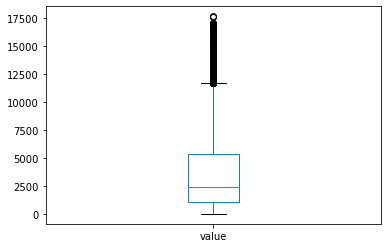

In [47]:
#using the data from previous to see if there are any abnormal transaction numbers
df_8['value'].plot(kind='box')
plt.show()

In [48]:
#from the plots we can identify that there lies deviation in the transactions
min_value = df_8['value'].min()
max_value = df_8['value'].max()

print('Minimum transaction value', ('$' + format(min_value, ',.2f')))
print('Maximum transactions value', ('$' + format(max_value, ',.2f')))

Minimum transaction value $0.00
Maximum transactions value $17,671.50


In [49]:
#Using machine learning to detect if anomalies
ml_data = df_8['value'].values

# For compatibility with the SciPy implementation
ml_data = ml_data.reshape(-1, 1)
ml_data = ml_data.astype('float64')

# Import kmeans from SciPy
from scipy.cluster.vq import kmeans
import scipy.cluster as cluster
    
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(ml_data, 4)

# Get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(ml_data, centroids)

In [50]:
len(ml_data)

37914

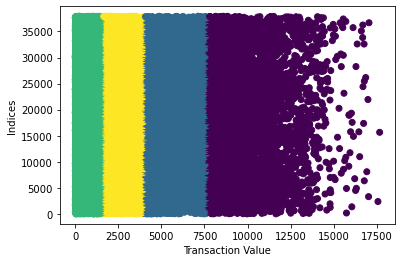

In [51]:
plt.scatter(ml_data, np.arange(0,37914), c=groups)
plt.xlabel('Transaction Value')
plt.ylabel('Indices')
plt.show()

In [52]:
#no anomalies, more correct to call them outliers

## Pattern

In [53]:
#Checking for which links gives the most traffic
df_link1 = df_tran[['PPC_ADD', 'PURCHASE']]
#df_link1 = df_link1[df_link1.PPC_ADD != ' ']
#f_link1 = df_link1[df_link1.PURCHASE != ' ']

df_link = df_link1.dropna(axis=0)
df_link = df_link[~df_link1.PURCHASE.str.contains('NO', na=False)]

df_link = df_link.groupby(['PPC_ADD']).size().reset_index(name='purchase')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [54]:
df_link

,PPC_ADD,purchase
0,BIANCA,8838
1,ISABELLA,6011
2,KENZA,2995
3,KEVIN,14857
4,NO,6081
5,SENDI,2874


<AxesSubplot:xlabel='PPC_ADD', ylabel='purchase'>

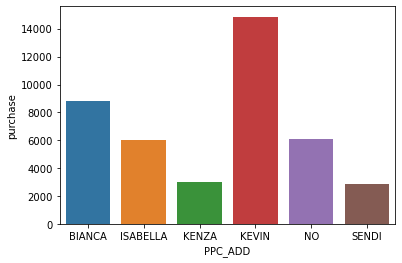

In [55]:
sns.barplot(x=df_link['PPC_ADD'], y=df_link['purchase'])